<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/reducao_dimensionalidade_rbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de **Restricted Boltzmann Machine - RBM** para redução da dimensionalidade e Naive Bayes para classificação. Foi feito também teste do classificador sem aplicar o algorítmo RBM.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [48]:
base = datasets.load_digits()
base

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [49]:
previsores = np.asarray(base.data, 'float32')
classe = base.target

previsores.shape, classe.shape

((1797, 64), (1797,))

In [50]:
scaler = MinMaxScaler(feature_range = (0,1))
previsores = scaler.fit_transform(previsores);

In [51]:
previsores

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]],
      dtype=float32)

In [52]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                                                                              classe, 
                                                                                              test_size = 0.2, 
                                                                                              random_state = 0)

In [53]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape

((1437, 64), (360, 64), (1437,), (360,))

In [54]:
rbm = BernoulliRBM(random_state = 0)

rbm.n_iter = 1000 #epochs
rbm.n_components = 100 #nós ou neurônios da camada escondida
naive_rbm = GaussianNB()

classificador_rbm = Pipeline(steps = [('rbm', rbm),
                                      ('naive', naive_rbm)])


classificador_rbm.fit(previsores_treinamento, classe_treinamento)

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1,
                              n_components=100, n_iter=1000, random_state=0,
                              verbose=0)),
                ('naive', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

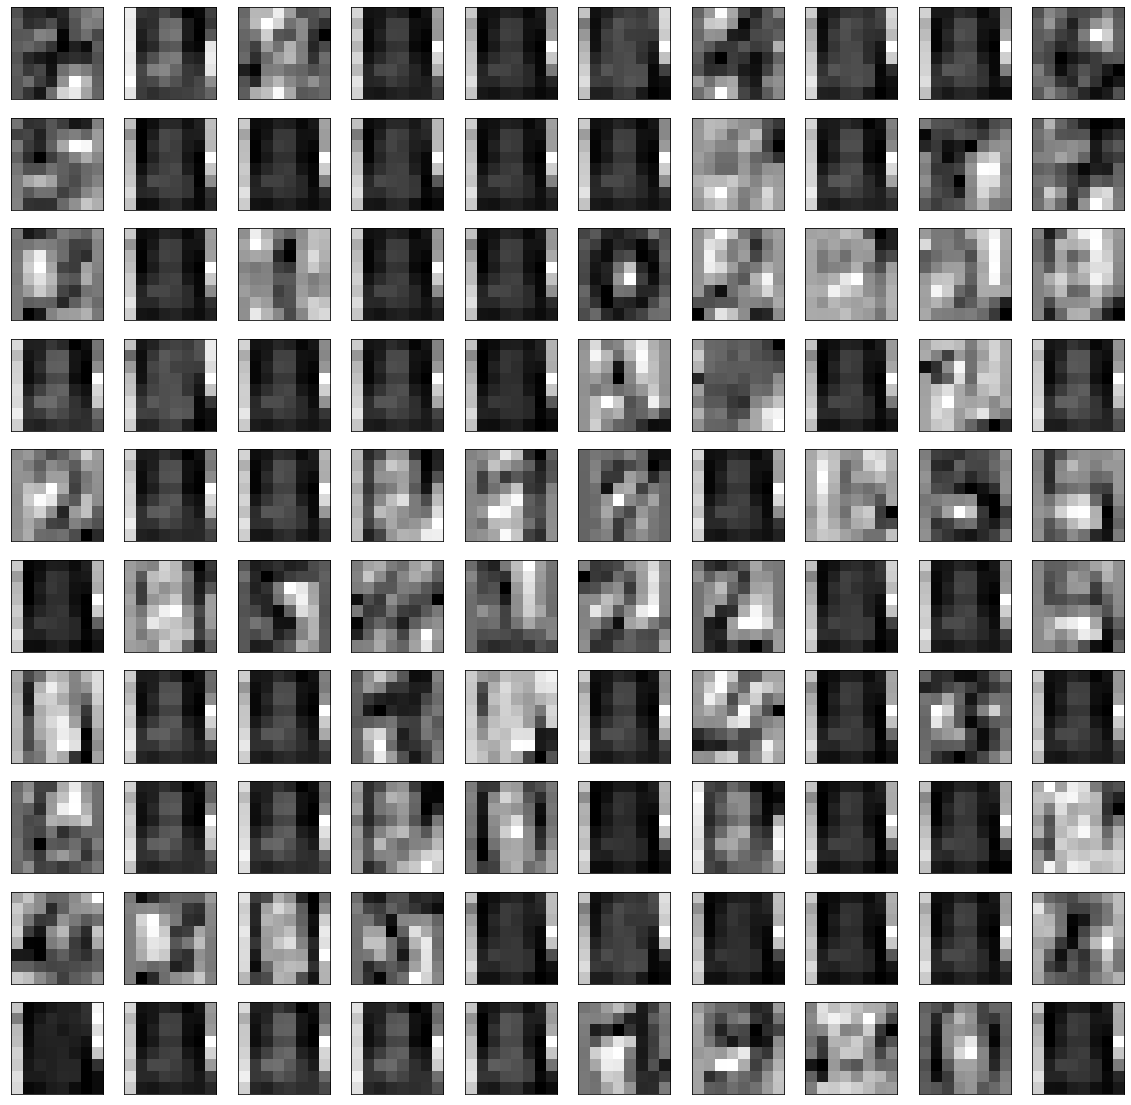

In [55]:
plt.figure(figsize = (20,20))
for i, com in enumerate(rbm.components_):
  plt.subplot(10,10, i + 1)
  plt.imshow(com.reshape((8,8)), cmap=plt.cm.gray_r)
  plt.xticks(())
  plt.yticks(())
plt.show()

In [56]:
previsoes_rbm = classificador_rbm.predict(previsores_teste)
previsoes_rbm

array([2, 2, 2, 6, 6, 7, 1, 9, 2, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       2, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 1, 6, 2, 1, 5, 6, 7, 3, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       3, 6, 8, 8, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 9, 6, 0, 5, 3, 7, 5,
       8, 2, 9, 9, 3, 1, 7, 7, 4, 7, 5, 7, 5, 5, 2, 5, 3, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 3, 1, 9, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 5, 9,
       3, 5, 9, 3, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 1, 7, 6, 7, 6, 5, 6, 0, 1, 8, 9, 3, 6, 1, 0, 7, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 8, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 9, 4, 8, 1, 6, 8, 9,
       2, 4, 3, 3, 7, 6, 2, 3, 3, 8, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       3, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       3, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 3, 4, 5, 4, 3, 4, 6, 2, 3, 0,

In [57]:
classe_teste[0], classe_teste[1], classe_teste[2], classe_teste[3], classe_teste[4], classe_teste[5], classe_teste[6]

(2, 8, 2, 6, 6, 7, 1)

In [58]:
precisao_rbm = metrics.accuracy_score(previsoes_rbm, classe_teste)
precisao_rbm

0.8777777777777778

In [59]:
naive_sem_rbm = GaussianNB()
naive_sem_rbm.fit(previsores_treinamento, classe_treinamento)
previsoes_naive = naive_sem_rbm.predict(previsores_teste)
precisao_naive = metrics.accuracy_score(previsoes_naive, classe_teste)
precisao_naive

0.8111111111111111